In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
white_wine_df = pd.read_csv('/Users/sejinmoon/Desktop/wine-white,red/winequality-white.csv',sep=';')
red_wine_df = pd.read_csv('/Users/sejinmoon/Desktop/wine-white,red/winequality-red.csv')

In [3]:
white_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# 데이터프레임 결합
wine_df = pd.concat([white_wine_df, red_wine_df], ignore_index=True)
wine_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


## 회귀모델 -Linear Regression

## 1.데이터 수집

In [6]:
# 독립 변수(X)와 종속 변수(y) 정의
X = wine_df.drop(columns='quality')
y = wine_df['quality']

## 2.데이터 분할

In [7]:
from sklearn.model_selection import train_test_split

# 학습 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(5197, 11)
(1300, 11)
(5197,)
(1300,)


## 3.모델 선택 및 학습

In [8]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 4.모델 예측

In [9]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(y_pred_train)
print(y_pred_test)

[5.44145153 5.54053296 5.59538363 ... 5.84032756 6.92454963 6.05588097]
[6.35167863 5.99594701 5.75384857 ... 5.57776274 5.67113773 5.43345791]


## 5. 모델 평가

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# 성능 평가
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(f'Train Mean Squared Error (MSE): {train_mse:.2f}')
print(f'Test Mean Squared Error (MSE): {test_mse:.2f}')
print('')
print(f'Train Mean Absolute Error (MAE): {train_mae:.2f}')
print(f'Test Mean Absolute Error (MAE): {test_mae:.2f}')
print('')
print(f'Train Root Mean Squared Error (RMSE): {train_rmse:.2f}')
print(f'Test Root Mean Squared Error (RMSE): {test_rmse:.2f}')

Train Mean Squared Error (MSE): 0.56
Test Mean Squared Error (MSE): 0.48

Train Mean Absolute Error (MAE): 0.57
Test Mean Absolute Error (MAE): 0.55

Train Root Mean Squared Error (RMSE): 0.75
Test Root Mean Squared Error (RMSE): 0.69


## 10-Cross Validation

In [11]:
from sklearn.model_selection import KFold

# 데이터가 numpy 배열이라면 pandas 객체로 변환
if isinstance(X, np.ndarray):
    X = pd.DataFrame(X)
if isinstance(y, np.ndarray):
    y = pd.DataFrame(y)

# 10-Fold 교차 검증 설정
kf = KFold(n_splits=10, shuffle=True, random_state=1)

mse_scores = []
mae_scores = []
rmse_scores = []

# 교차 검증 수행
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # 모델 학습
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 모델 예측
    y_pred = model.predict(X_test)

    # 성능 평가
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    mse_scores.append(mse)
    mae_scores.append(mae)
    rmse_scores.append(rmse)

# 평균 및 표준편차 계산
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f'10-Fold Cross-Validated Mean Squared Error (MSE): {mean_mse:.2f} ± {std_mse:.2f}')
print(f'10-Fold Cross-Validated Mean Absolute Error (MAE): {mean_mae:.2f} ± {std_mae:.2f}')
print(f'10-Fold Cross-Validated Root Mean Squared Error (RMSE): {mean_rmse:.2f} ± {std_rmse:.2f}')

# 최종 모델 학습 및 예측 (전체 데이터를 사용하여 학습)
model.fit(X, y)
y_pred = model.predict(X)

10-Fold Cross-Validated Mean Squared Error (MSE): 0.54 ± 0.04
10-Fold Cross-Validated Mean Absolute Error (MAE): 0.57 ± 0.02
10-Fold Cross-Validated Root Mean Squared Error (RMSE): 0.74 ± 0.03


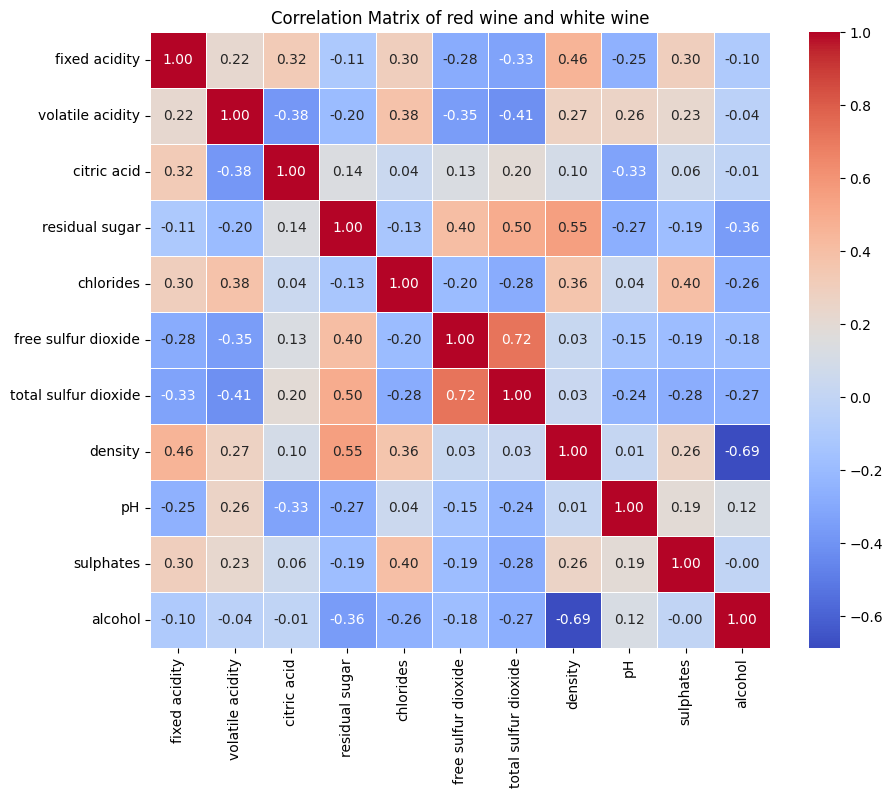

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# 상관관계 계산
correlation_matrix = X.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of red wine and white wine')
plt.show()

## 회귀모델 - Logistic Regression

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 독립 변수(X)와 종속 변수(y) 정의
X = wine_df.drop(columns='quality')
y = wine_df['quality']

# 학습 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 생성 및 학습
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 예측 결과 평가
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:{accuracy:.2f}")

Accuracy:0.47


/Users/sejinmoon/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


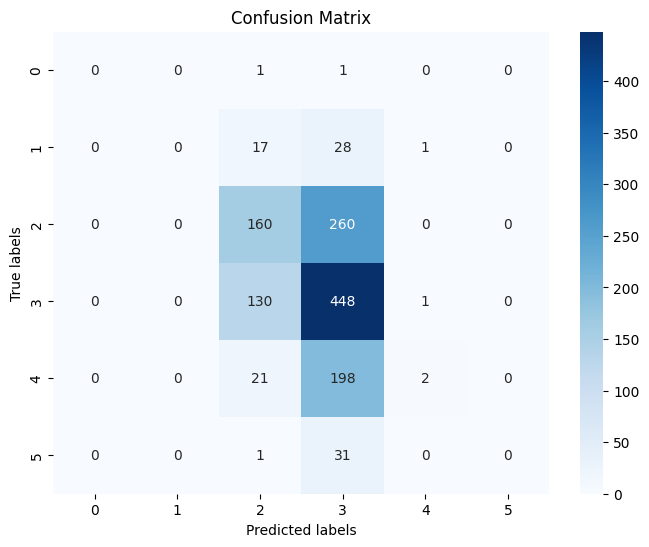

In [14]:
import seaborn as sns

# 혼동 행렬 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## 회귀모델 - KNN

In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 독립 변수(X)와 종속 변수(y) 정의
X = wine_df.drop(columns='quality')
y = wine_df['quality']

# 학습 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN 회귀 모델 생성
k = 5  # 이웃의 수
knn_regressor = KNeighborsRegressor(n_neighbors=k)

# 모델 학습
knn_regressor.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred_test = knn_regressor.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:{accuracy:.2f}")

Mean Squared Error (MSE): 0.62
Mean Absolute Error (MAE): 0.61
Root Mean Squared Error (RMSE): 0.79
Accuracy:0.47


## 회귀모델 - Decision Tree

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 독립 변수(X)와 종속 변수(y) 정의
X = wine_df.drop(columns='quality')
y = wine_df['quality']

# 학습 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 결정 트리 분류기 생성
decision_tree = DecisionTreeClassifier()

# 모델 학습
decision_tree.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = decision_tree.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:{accuracy:.2f}")


Mean Squared Error (MSE): 0.62
Mean Absolute Error (MAE): 0.61
Root Mean Squared Error (RMSE): 0.79
Accuracy:0.61


## Decision Tree의 성능이 가장 우수